# Predicting Spotify Top Hits: A Machine Learning Approach to Song Popularity

## Introduction:


    Music is a huge part of modern culture, with people across the world able to band together under a familiar tune or make the day-in-day-out a bit less tedious. Music is always in high demand, constantly being created and acting as one of the largest sources of entertainment. Our dataset features the top music hits of the 00’s and 10’s. We aim to classify tracks and help separate the most popular tracks from background music. 
     

    For this project, we will create several classification models to predict the popularity of tracks in our dataset.  There are certain features that greatly influence a song’s popularity, such as an artist’s following or the genre, but we want to discover if these surface-level elements are truly what dictate a certified banger or if it's the underlying features that are less obvious to listeners.


    As we explore the different features and machine-learning models we hope to answer some of these guiding questions: 
    
        1) What elements have the strongest impact in propelling songs to the top of the charts?
        
        2) What types of models best fit with our dataset and what metrics will be used to gain the most insight into our 
           models?
           
        3) How do different feature selection methods impact model performance? What are the optimal features to place in our
           model?
 


## Exploring our Dataset:


Our data comes from the “Top Hits Spotify from 2000-2019” [dataset](https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019/data
) on Kaggle, collected by Mark Koverha. The data consists of roughly 1,900 entries across 18 features and is 254.99 kB in size. The first two columns identify variables, giving the artist’s name and song name. There are several variables that people can immediately identify, such as release year or genre, but 11 of the variables give numerical values to elements of the song, such as “acousticness” or “liveness,” which are much harder to quantify. 


## Pre-Processing the Data:

In [325]:
# Import all necessary Python libraries and modules
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt 
from sklearn import preprocessing

#Load in dataset
df = pd.read_csv("dataset.csv");
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [327]:
df.shape # 2000 songs and 18 features

(2000, 18)

In [329]:
df.dtypes # match as expected

artist               object
song                 object
duration_ms           int64
explicit               bool
year                  int64
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object

In [331]:
df.isna().sum() # No Null values

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [333]:
df.duplicated().sum() # 59 Duplicates in our dataset

59

In [335]:
df.drop_duplicates(inplace=True) # Dropping all 59 duplicate entries b/c we have a large set of entires in our dataset (1900+)

In [337]:
df.shape # 1941 Songs left after dropping duplicates

(1941, 18)

In [339]:
df.drop(columns=["key", "song", "mode"], inplace=True) # Drop irrelevant columns in the dataset

In [341]:
# Split genre column into multiple values and hot encode the newly created columns (Used ChatGPT-4 for assistance on creating the Lamda functions)
df['genre'] = df['genre'].str.split(r'\s*,\s*')

all_genres = set([genre for genres in df['genre'] for genre in genres])

for genre in all_genres:
    df[genre] = df['genre'].apply(lambda x: 1 if genre in x else 0)

# Drop the original Genre column after hot encoding
df = df.drop(columns=['genre'])




In [343]:
df.columns

Index(['artist', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'classical', 'R&B',
       'World/Traditional', 'latin', 'Dance/Electronic', 'rock', 'hip hop',
       'Folk/Acoustic', 'metal', 'jazz', 'blues', 'set()', 'pop', 'country',
       'easy listening'],
      dtype='object')

In [345]:
df = df[df["set()"] != 1] # filters any song that has a genre set to set() b/c there is no set() genre


In [347]:
df = df.drop(columns=['set()']) # Drops the set() column

In [349]:
# Hot encodes artist features that will be used in our models
df = pd.get_dummies(df, columns=["artist"], prefix="artist")

In [351]:
# Lets standardize the data to ensure that our features are all on the same scale
standardized_df = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df),columns = df.columns)
standardized_df.head()

,duration_ms,explicit,year,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,...,artist_alt-J,artist_benny blanco,artist_blackbear,artist_blink-182,artist_fun.,artist_girl in red,artist_iann dior,artist_iio,artist_t.A.T.u.,artist_will.i.am
0,-0.449266,-0.62174,-1.619698,0.804072,0.597047,0.737144,0.034022,-0.627735,1.003101,-0.172803,...,-0.022834,-0.022834,-0.022834,-0.022834,-0.022834,-0.022834,-0.0323,-0.022834,-0.022834,-0.045703
1,-1.574732,-0.62174,-1.789768,0.896804,-1.656038,1.149391,0.304838,-0.574844,-0.682162,-0.173005,...,-0.022834,-0.022834,-0.022834,43.794977,-0.022834,-0.022834,-0.0323,-0.022834,-0.022834,-0.045703
2,0.556032,-0.62174,-1.789768,0.294046,-0.980823,-1.474598,-1.800428,-0.780186,0.264308,-0.173005,...,-0.022834,-0.022834,-0.022834,-0.022834,-0.022834,-0.022834,-0.0323,-0.022834,-0.022834,-0.045703
3,-0.108951,-0.62174,-1.619698,0.850438,-0.824458,1.254089,0.745045,-0.597659,-0.589086,-0.172851,...,-0.022834,-0.022834,-0.022834,-0.022834,-0.022834,-0.022834,-0.0323,-0.022834,-0.022834,-0.045703
4,-0.719823,-0.62174,-1.619698,0.247680,-0.376684,1.352244,0.362503,-0.545805,-0.504735,-0.161118,...,-0.022834,-0.022834,-0.022834,-0.022834,-0.022834,-0.022834,-0.0323,-0.022834,-0.022834,-0.045703


## Data Visualization / Understanding:

#### General Distribution of Song Genres

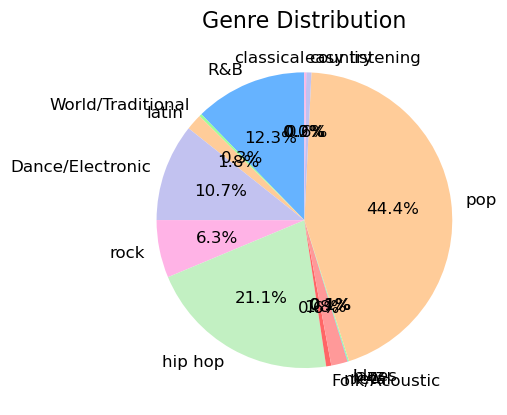

In [353]:
mylabels = ['classical', 'R&B',
       'World/Traditional', 'latin', 'Dance/Electronic', 'rock', 'hip hop',
       'Folk/Acoustic', 'metal', 'jazz', 'blues', 'pop', 'country',
       'easy listening']

# Calculate the total value for each genre
y = df[['classical', 'R&B',
       'World/Traditional', 'latin', 'Dance/Electronic', 'rock', 'hip hop',
       'Folk/Acoustic', 'metal', 'jazz', 'blues', 'pop', 'country',
       'easy listening']].sum()

# Creating and changing pie chart arguments
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c2f0c2','#ff6666']
plt.pie(y, labels=mylabels, startangle=90, autopct='%1.1f%%', textprops={'fontsize': 12}, colors=colors)
plt.title("Genre Distribution", fontsize=16)
plt.show()

#### How Strongly Correlated are our Features?

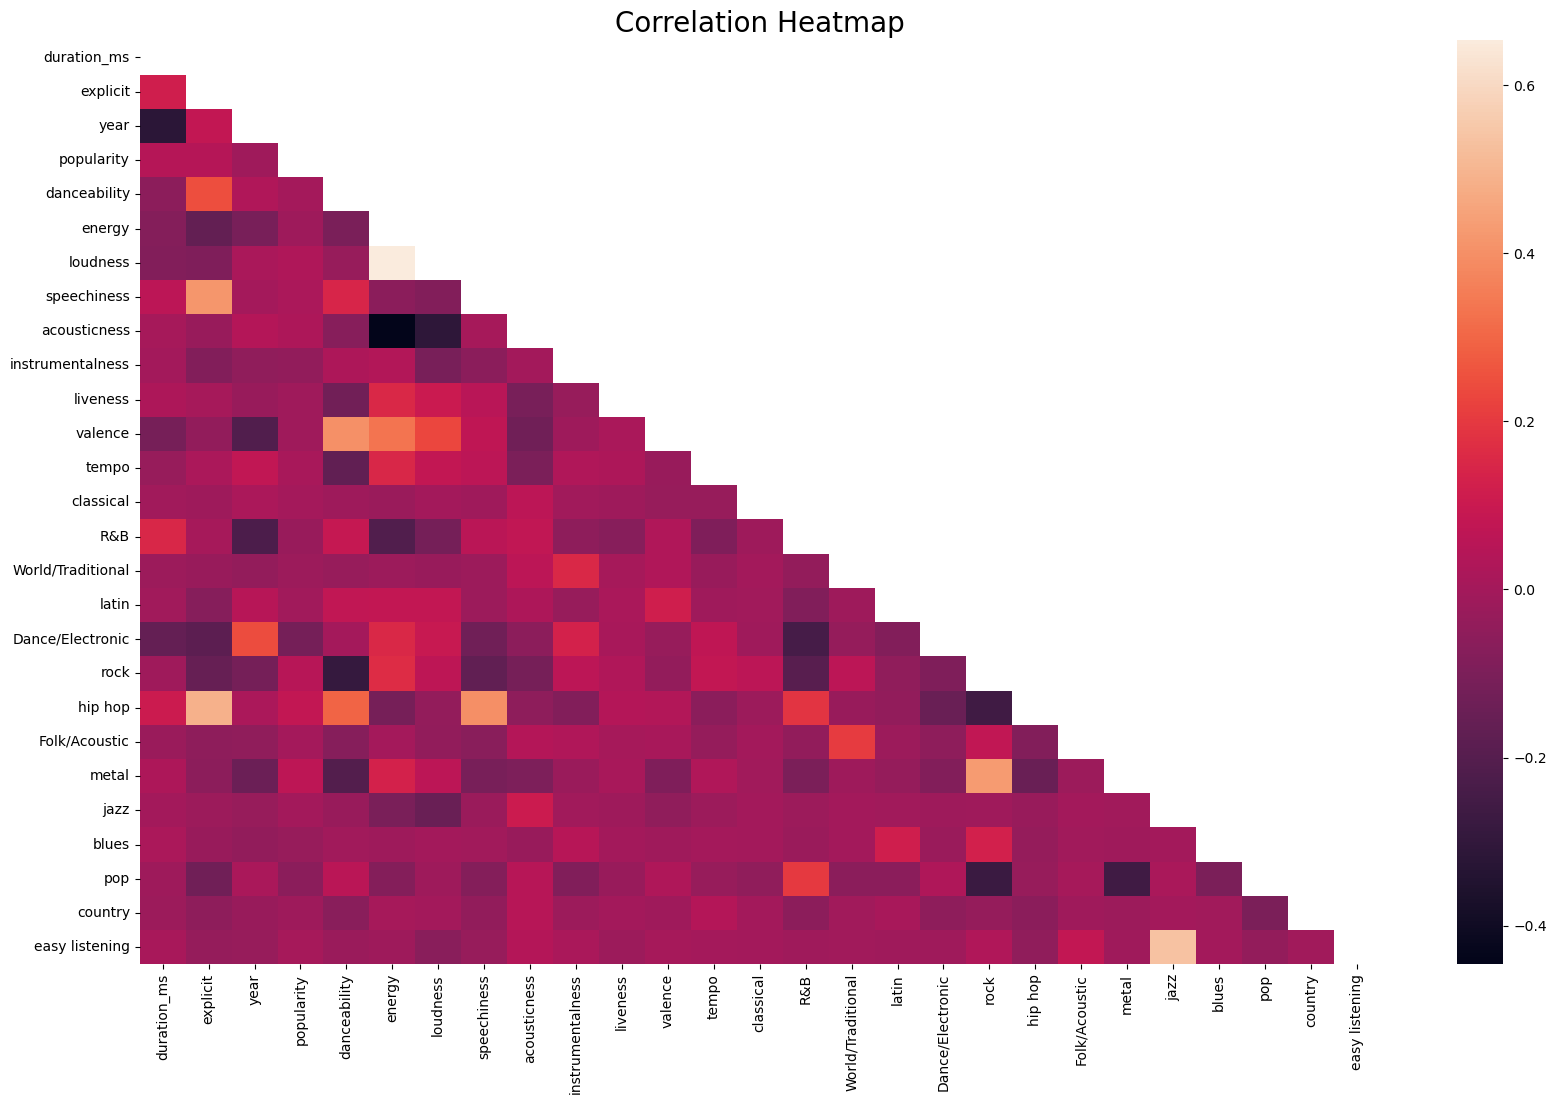

In [358]:
# Get the correlations
correlation_columns = [col for col in standardized_df.columns if not col.startswith("artist_")] # Excludes columns that contain artist_names as they won't have any correlations with any features in our dataset
correlation_df = df[correlation_columns]
corr = correlation_df.corr()

# Create a mask so that way we only see the lower half of the matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20, 12))

sns.heatmap(corr, mask=mask)

plt.title('Correlation Heatmap', fontsize=20)
plt.show()